In [1]:
#%% Import modules 

import csv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#%% Clean Data 

def to_df(filename):
    """Convert csv to dataframe, dropping rows with NaN"""
    df = pd.read_csv(filename)
    df.dropna(inplace=True)
    return df

#%% Combine Dataframes
def tract_join(sunroof_df, tract_df):
    '''
    Join df2 first column to df1.region_name:
    input: df, df
    output: df
    '''
    #df_new = pd.merge(df1.rename(columns={"region_name":"TractId"}), df2, how='inner', on=["TractId"])
    df_new = pd.merge(sunroof_df, tract_df.rename(columns={tract_df.columns[0]:"region_name"}), how='inner', on=["region_name"])
    return df_new

def state_join(sunroof_df, tract_df):
    '''
    Join df2 second column to df1.state_name:
    input: df, df
    output: df
    '''
    #df_new = pd.merge(df1.rename(columns={"region_name":"TractId"}), df2, how='inner', on=["TractId"])
    df_new = pd.merge(sunroof_df, tract_df.rename(columns={tract_df.columns[1]:"state_name"}), how='inner', on=["state_name"])
    return df_new

In [11]:
#%% Main Function

#the main census and sunroof dataset data
census2017_df = to_df('acs2017_census_tract_data.csv')
sunroof_origional_df = to_df("sunroof_solar_potential_by_censustract.csv")

#subportions of those datasets
census2017_demography_df = census2017_df[["TractId", "State", "County", "TotalPop", "Men", "Women", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
census2017_income_df = census2017_df[["TractId", "State", "County", "TotalPop", "Income", "IncomeErr", "IncomePerCap", "IncomePerCapErr", "Poverty", "Employed", "Unemployment"]]


sunroof_total_df = sunroof_origional_df[["region_name", "state_name", "yearly_sunlight_kwh_total", "carbon_offset_metric_tons"]]
sunroof_avg_df = sunroof_origional_df[["region_name", "state_name", "yearly_sunlight_kwh_kw_threshold_avg", "yearly_sunlight_kwh_median"]]

#for marco emily xinyu
sunroof_coverage_df = sunroof_origional_df[["region_name","state_name", "lat_avg", "lng_avg", "count_qualified","existing_installs_count", "percent_qualified", "kw_median", "carbon_offset_metric_tons"]]


#combine solar and census dataframes
census2017_total_df = tract_join(sunroof_total_df, census2017_demography_df)

county_census_2017_df = to_df('acs2017_county_data.csv')

In [15]:
census2017_income_df
def weighted_average(income, total):
    return income*total

census2017_income_df['Weighted_Avg'] = weighted_average(census2017_income_df['Income'], census2017_income_df['TotalPop'])
census2017_income_df

<ipython-input-15-631547a7ca3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2017_income_df['Weighted_Avg'] = weighted_average(census2017_income_df['Income'], census2017_income_df['TotalPop'])


,TractId,State,County,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,Weighted_Avg
0,1001020100,Alabama,Autauga County,1845,67826.0,14560.0,33018.0,6294.0,10.7,881,4.6,125138970.0
1,1001020200,Alabama,Autauga County,2172,41287.0,3819.0,18996.0,2453.0,22.4,852,3.4,89675364.0
2,1001020300,Alabama,Autauga County,3385,46806.0,9496.0,21236.0,2562.0,14.7,1482,4.7,158438310.0
3,1001020400,Alabama,Autauga County,4267,55895.0,4369.0,28068.0,3190.0,2.3,1849,6.1,238503965.0
4,1001020500,Alabama,Autauga County,9965,68143.0,14424.0,36905.0,10706.0,12.2,4787,2.3,679044995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,20522.0,2879.0,8643.0,1218.0,39.4,1576,20.8,123357742.0
73997,72153750502,Puerto Rico,Yauco Municipio,2342,24605.0,6027.0,11109.0,1829.0,35.5,666,26.3,57624910.0
73998,72153750503,Puerto Rico,Yauco Municipio,2218,18225.0,4913.0,9603.0,2162.0,52.8,560,23.0,40423050.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,18688.0,4501.0,8331.0,1280.0,50.1,1062,29.5,81853440.0


In [4]:
census2017_coverage_df = tract_join(sunroof_coverage_df, census2017_demography_df)
#census2017_coverage_df = census2017_coverage_df.groupby("County").mean()
census2017_coverage_df

,region_name,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific
0,6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,California,Los Angeles County,3775,1940,1835,98.0,2.0,0.0,0.0,0.0,0.0
1,36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,New York,Monroe County,4590,3058,1532,13.0,46.5,33.1,0.0,3.8,0.0
2,17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,Illinois,Winnebago County,3353,1606,1747,3.6,86.7,5.2,0.0,1.7,0.0
3,42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,Pennsylvania,Allegheny County,2320,927,1393,0.8,44.1,46.9,0.0,1.6,0.0
4,6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,California,Orange County,6505,3301,3204,66.8,14.6,2.4,0.0,13.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48023,48121020113,Texas,33.176277,-96.911400,1930,14,84.426947,7.50,10684.715336,Texas,Denton County,12716,6351,6365,27.9,47.4,17.6,0.1,2.5,0.0
48024,34027042302,New Jersey,40.838047,-74.476219,491,5,45.887850,6.25,13640.429234,New Jersey,Morris County,3039,1517,1522,7.0,81.1,3.0,0.0,7.6,0.0
48025,6037543322,California,33.852547,-118.256958,2098,18,96.548550,8.75,8901.367807,California,Los Angeles County,7348,3534,3814,9.1,2.7,67.7,1.0,8.4,0.0
48026,45079010309,South Carolina,34.113491,-81.140663,2763,15,83.550045,7.00,19496.263266,South Carolina,Richland County,9938,4938,5000,6.0,59.2,30.1,0.0,1.3,0.0


In [5]:
geo_df = gpd.GeoDataFrame(census2017_coverage_df, crs = {'init': 'epsg:4326'}, geometry=gpd.points_from_xy(census2017_coverage_df.lng_avg, census2017_coverage_df.lat_avg))
# TO DO: geo_df.drop(["State"], axis=1) 2nd State column won't drop?

geo_df.head()

/Applications/Utilities/anaconda3/envs/geo/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,region_name,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,State,...,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,geometry
0,6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,California,...,3775,1940,1835,98.0,2.0,0.0,0.0,0.0,0.0,POINT (-118.43272 34.26704)
1,36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,New York,...,4590,3058,1532,13.0,46.5,33.1,0.0,3.8,0.0,POINT (-77.60704 43.15637)
2,17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,Illinois,...,3353,1606,1747,3.6,86.7,5.2,0.0,1.7,0.0,POINT (-89.06659 42.27779)
3,42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,Pennsylvania,...,2320,927,1393,0.8,44.1,46.9,0.0,1.6,0.0,POINT (-79.99373 40.42296)
4,6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,California,...,6505,3301,3204,66.8,14.6,2.4,0.0,13.1,0.0,POINT (-117.93311 33.84404)


In [6]:
# Examining income/poverty data

county_census_2017_df
county_census_2017_df.drop(['VotingAgeCitizen', 'IncomeErr', 'IncomePerCapErr', 'ChildPoverty', 'MeanCommute', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'WorkAtHome', 'PrivateWork', 'PublicWork'], axis=1)
county_census_2017_df

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']


ConversionError: Failed to convert value(s) to axis units: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']

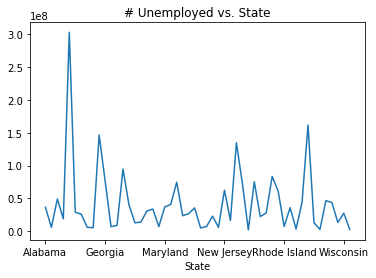

In [45]:
# Unique states in list
#unique_states = county_census_2017_df.State.unique()
#unique_states_list = []
#[unique_states_list.append(state) for state in county_census_2017_df['State'] if state not in unique_states_list]
#unique_states_list

states = county_census_2017_df['State']
unique_states = []
states_list = [unique_states.append(state) for state in states if state not in unique_states]
print(unique_states)

# Compute the number of unemployed individuals in state using %age unemployed
# Want to sum up by state, in order to determine metrics and visualize
def multiply(x,y):
    return round(x*y)

county_census_2017_df['# Unemployed'] = multiply(county_census_2017_df['TotalPop'],county_census_2017_df['Unemployment'])
# # unemploymed are VERY high ...
county_census_2017_df

state_vs_unemployed = county_census_2017_df.groupby(["State"])["# Unemployed"].agg('sum')
state_vs_unemployed

# Examine states with highest unemployment rates
state_vs_unemployed.plot()
plt.title('# Unemployed vs. State')
plt.xticks(unique_states) ## TO DO: X TICKS!! - show ALL state names

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']


Text(0.5, 1.0, 'Poverty vs. Unemployment (US)')

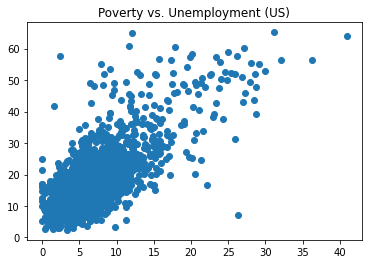

In [49]:
# Visualizations 

# Is there a correlation between unemployment and poverty? - TRY TO COLOR CODE BY STATE?
#county_census_2017_df.plot(x='Unemployment', y='Poverty', kind='scatter')
states = county_census_2017_df['State']
unique_states = []
states_list = [unique_states.append(state) for state in states if state not in unique_states]
print(unique_states)

x=county_census_2017_df['Unemployment']
y=county_census_2017_df['Poverty']
color=county_census_2017_df['State']
plt.scatter(x, y)
plt.title('Poverty vs. Unemployment (US)')

<AxesSubplot:>

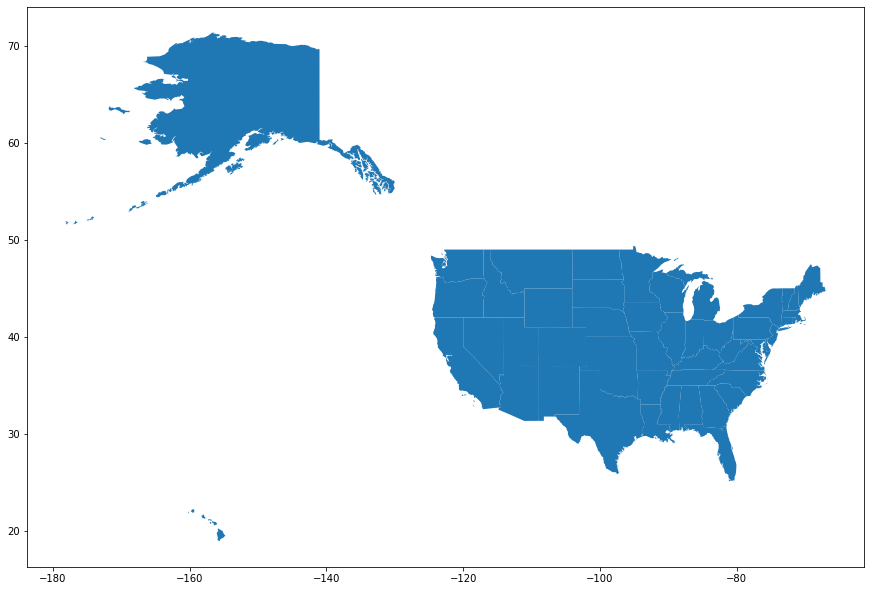

In [9]:
us_map = gpd.read_file("States_shapefile-shp")
fig,ax = plt.subplots(figsize = (15,15))
us_map.plot(ax = ax)

[]

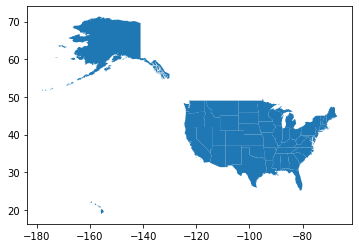

In [10]:
us_map.plot()
x = geo_df.plot(ax = ax, markersize = 20^20^2000, color = 'red',marker = '*',label = 'USA')
plt.plot()